# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [3]:
df.shape

(1898, 9)

#### Observations:
 The dataset has 1898 rows (1898 unique orders by customers) each with 9 unique attributes (columns)

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [4]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
We previously learned that each value (row) has 9 attributes (columns) of different information for each customer order. In our dataframe, we have 7 columns of information + the customer ID number + the order ID number and each column has 1898 rows with values. 4 of the columns have data that is all integers, 4 other columns have data with object data types, and 1 column has all float data. The dataframe takes up 133.6+kb worth of memory as it stands at this moment. 

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [5]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

df.restaurant_name = df.restaurant_name.astype('category')
df.cuisine_type = df.cuisine_type.astype('category')
df.day_of_the_week = df.day_of_the_week.astype('category')

    
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
All values in the columns restaurant_name, cuisine_type, and day_of_the_week were converted from object data types to categories. This is useful because there is likely some repetition within the data that are in these columns. For example, there are only 2 possibilities of values that will be listed in the day_of_the_week attribute: Weekday and Weekend. 

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [6]:
df.describe()

#i used .describe() because it is a simple function within pandas that will calculate valuable statistical data
#for the numerical variables within the dataset. 

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
This table shows the count (amount of individual values), mean (average), standard deviation, min (smallest value), 1st/2nd/3rd quantile values, and max (largest value) of all of the columns in the data frame with numerical data (integer and float types). We cannot calculate the summary statistics for columns with non-numerical data such as restaurant_name and day_of_the_week.

The most valuable statistical outcomes within this table come from the columns cost_of_the_order, food_preparation_time, and delivery_time. Order_id and customer_id columns have unique values for every single order for identification purposes so statistics on them will not provide us any useful information. 

### **Question 5:** How many orders are not rated? (0.5 mark)

In [7]:
print(df['rating'].value_counts())
print(df['rating'].count())

#I used dataframe['column (variable to explore)'].value_counts() to calculate the the number of unique values
#within the 'rating' variable. The rating variable appears numerical but the data is discrete and only houses the 
#values of '3','4','5', and 'Not given'. This means that it would make sense to treat it as a categorical variable
#in terms of looking for the number of unique values and their counts within the data. 

#I then used .count() in order to obtain the overall number of individual values within the 'rating' variable
#which is essentially the number of rows within the column. This gives us the total number of orders 
#within the dataset. 

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
1898


#### Observations:
There were 736 of the 1898 orders that were categorized as "not given" (were not rated). 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

In [8]:
#I started by defining a function to create boxplots and histograms (combined into 1 figure) for numerical variables: 
#cost_of_the_order, food_preparation_time, delivery_time
#so that the same formatting is used for each variable, which makes the code cleaner. 

#I ignored the order_ID and customer_ID variables because visualizing them 
#would not provide us with any useful information. 

#The "rating" variable is an object type variable and will be treated as a categorical variable for 
#analysis since it is discrete and not continuous.

#histogram+boxplot function that is used. 
#I called the function "histogram_boxplot".
def histogram_boxplot(data, feature, figsize=(12,7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)
    sns.boxplot(data=df, x=feature, ax=ax_box2, showmeans=True, color="yellow")
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="purple", linestyle="-")
    
#I used the same function that we used in the Uber case study from MLS4 with some modifications to fit this
#specific data. 
    #data = dataframe
    #feature = column
    #figsize = size of the figure
    #kde = False = sets the default to not show the kernel density curve within the histogram
    #bins = None = sets the default to not group the histogram data into bins
    
    #f2 line defines the layout of the figure to have 2 visual plots within it (the hisogram and the boxplot)
    #ax_box2 = the boxplot, ax_hist2 = the histogram, plt.subplots = divides the output into 1 figure with 2 graphs
    #within it, nrows = 2 rows with 1 plot each (the graphs are on stacked on top of each other and not side-by-side),
    #sharex=True = the 2 graphs share an x axis, gridspec_kw = the ratio of the heights of the 2 graphs are 0.25
    #to 0.75 of the vertical space
    
    #sns.boxplot and sns.histplot give the specifications for the individal graphs themselves. 
    #the boxplot is set to show the mean of the data within it (showmeans=True), color = Yellow sets the box to be 
    #yellow colored.
    #the histplot is set to respect the original bins boundaries unless otherwise told not to. 
    
    #ax_hist2.axvline ... .mean() and .median() add in lines to the histogram for the mean and median of the
    #data with specified line colors and styles. 

mean: 16.498851422550082
mode: 0    12.18
dtype: float64
median: 14.14


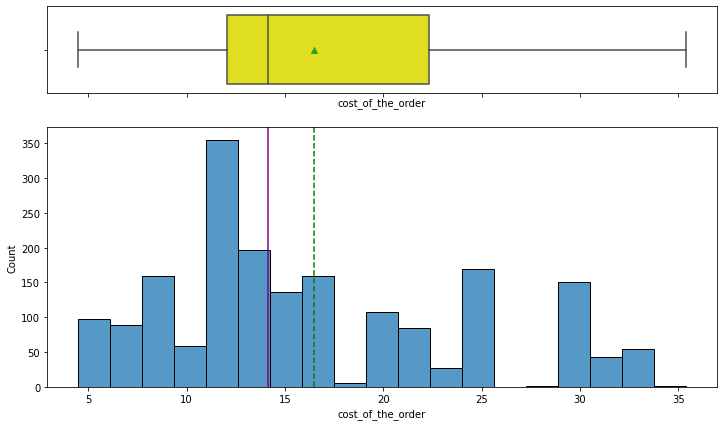

In [9]:
histogram_boxplot(df, 'cost_of_the_order')

print("mean:", df['cost_of_the_order'].mean())
print("mode:", df['cost_of_the_order'].mode())
print("median:", df['cost_of_the_order'].median())

<b>Observations: </b>
- the cost of the order distribution is slightly right skewed
- the majority of orders cost about 12 dollars (12.18 to be exact)
- the median cost of orders is just below 15 dollars (median = 14.14)
- the cost of orders distribution ranges from just under 5 dollars to just over 35 dollars
- there are no outliers within this data

mean: 27.371970495258168
mode: 0    21
dtype: int64
median: 27.0


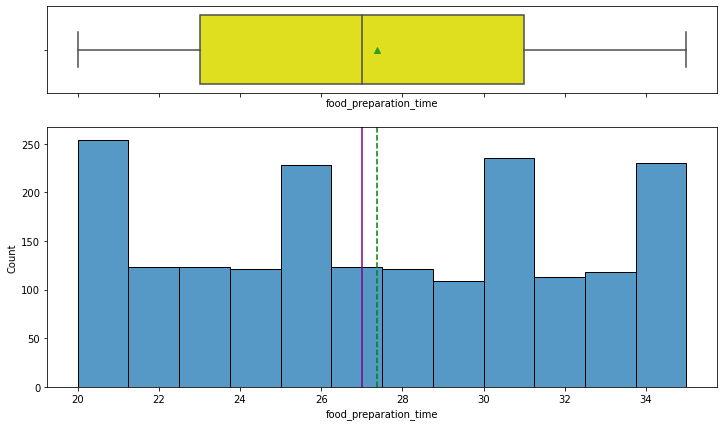

In [10]:
histogram_boxplot(df, 'food_preparation_time')

print("mean:", df['food_preparation_time'].mean())
print("mode:", df['food_preparation_time'].mode())
print("median:", df['food_preparation_time'].median())

<b>Observations: </b>
- the distribution of the food preparation time shows no skewness and is evenly spread throughout the values. the mean and median are very close together and both fall in the middle of the data. the distribution shows a very slight right skew. 
- the majority of orders take about 21 minutes to prepare
- the median time to prepare orders is 27 minutes
- the food preparation time distribution ranges from 20 minutes to 35 minutes
- there are no outliers within this data

mean: 24.161749209694417
mode: 0    24
dtype: int64
median: 25.0


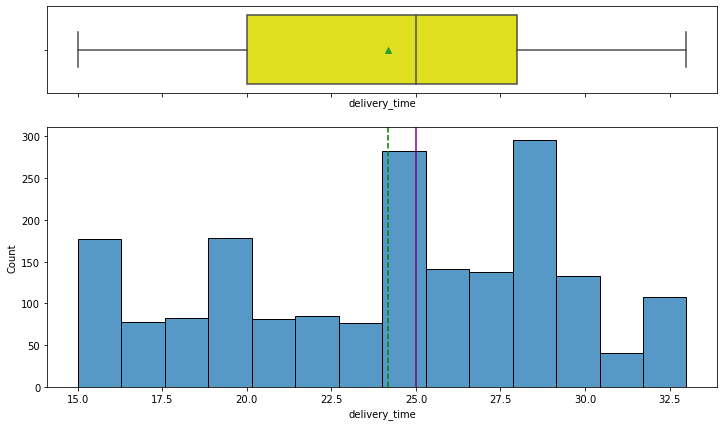

In [11]:
histogram_boxplot(df, 'delivery_time')

print("mean:", df['delivery_time'].mean())
print("mode:", df['delivery_time'].mode())
print("median:", df['delivery_time'].median())

<b>Observations: </b>
- the distribution of the food delivery times shows a slight left skew. 
- the majority of orders take about 24 minutes to be delivered
- the median time to deliver orders is 25 minutes
- the food delivery time distribution ranges from 15 minutes to 33 minutes
- there are no outliers within this data

In [12]:
#I create another function to create barplots for the categorical variables: 
#cuisine_type, day_of_the_week, and rating. 

#function:
def labeled_barplot(data, feature, perc=False, n=None): #perc=False makes it so that 
                                                        #the default is to not show the relative percentages 
                                                        #of the bars within the barplots instead of actual counts. 
    total=len(data[feature]) #defines the total to the length of the column
    count=data[feature].nunique() #defines the "count" variable as the number of distinct 
                                    #categories (bars) within the data 
    if n is None:
        plt.figure(figsize= (count+1, 5))
    else:
        plt.figure(figsize= (n+1, 5)) #defines the size of the graph based on the size of each bar 
    
    plt.xticks(rotation=90, fontsize=15) #gives specifications on the x-axis labels
    ax = sns.countplot(data=data, x=feature, order=data[feature].value_counts().index[:n].sort_values())
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total) #formula for the percentage labels if used 
                                                                    #in place of the actual counts of the data.
        else:
            label = p.get_height() #count of each level of the category
        x = p.get_x() + p.get_width() / 2   #width of the plot
        y = p.get_height()  #height of the plot

        ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points")
        #gives the specifications for size and positioning of the labels that will sit on top of each category (bar)

    plt.xticks(rotation = 60) #rotates the x-axis labels by 60 degrees
    plt.show() #shows the plot

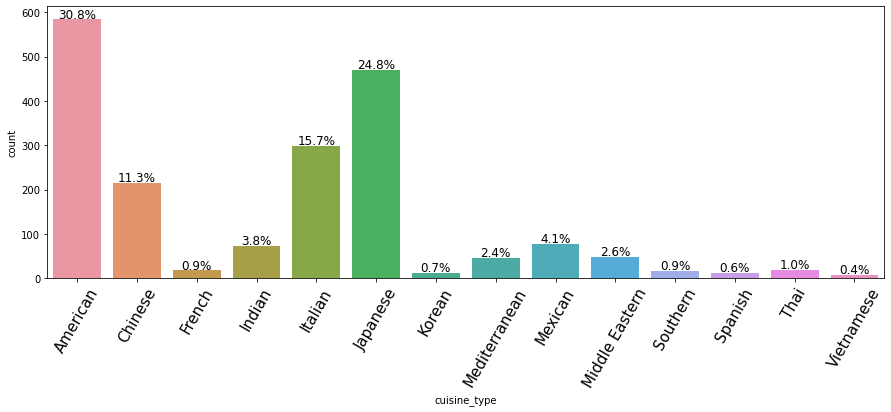

In [13]:
#bar plot for cuisine_type

labeled_barplot(df,'cuisine_type',perc=True)

<b>Observations: </b>
- American food makes up 30.8% of all orders
- The next 3 most common cuisine types ordered are japanese (24.8%), italian (15.7%), and chinese (11.3%) 
- All other cuisine types each make up less than 5% of all orders

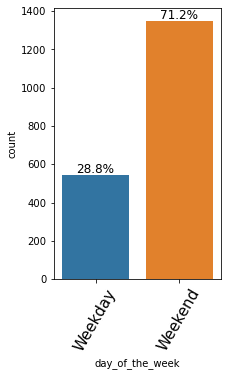

In [14]:
#barplot for day_of_the_week

labeled_barplot(df,'day_of_the_week',perc=True)

<b>Observations: </b>
- A majority of orders are placed on the weekend (71.2%)
- only 28.8% of all orders are placed on a weekday

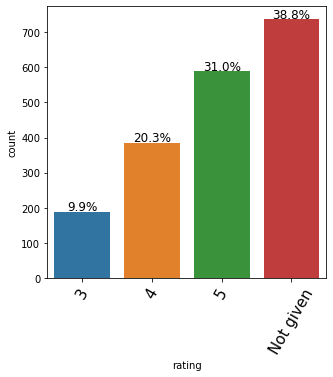

In [15]:
#barplot for rating

labeled_barplot(df,'rating',perc=True)

<b>Observations: </b>
- Almost half (38.8%) of all orders are not given a rating at all
- 31% of orders are given a full 5 rating
- orders with a minimum score of 3 only occur 9.9% of the time

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [16]:
df['restaurant_name'].value_counts()

#i used .value_counts() to get counts of each unique value within the column 'restaurant_name' which then
#outputs the number of total orders from individual restaurants within the dataset sorted in descending order. 

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm are the top 5 restaurants with the highest number of orders in descending order. The value_counts() function defaults to sorting in descending order. 

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [17]:
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()

#splitting the data into groups by the 2 columns of day_of_the_week and cuisine_type to get the counts of the
#number of orders placed in each cuisine type separated by weekday/weekend. 

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
the most popular cuisine type on the weekends is first American (followed by Japanese, then Italian)

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [18]:
cost_above_20bucks = df[df['cost_of_the_order']>20].shape[0] 
print("total number of orders that cost above $20:",cost_above_20bucks)
# .shape[0] gives the number of rows which would equal the number of unique orders (rows) 
# that are valued greater than 20

#calculating the total number of orders within the dataset
total = df['cost_of_the_order'].shape[0]
print("overall total number of orders:",total)

#calculating the percetage of orders over $20 using the 2 variables defined above
percentage = (cost_above_20bucks/total) * 100

print("Percentage of orders >$20:", percentage,"%")

print(" ") #blank line to create some separation
print(" ") #blank line to create some separation
print("Percentage of orders <$20:",100-percentage,"%")

total number of orders that cost above $20: 555
overall total number of orders: 1898
Percentage of orders >$20: 29.24130663856691 %
 
 
Percentage of orders <$20: 70.75869336143309 %


#### Observations:
- The total percentage of orders that cost greater than 20 dollars is 29.2413066...% (rounded to 29.24%)
- Therefore, just over 70% of orders cost less than 20 dollars

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [19]:
#calculating the mean of the column 'delivery_time'
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The average (mean) delivery time is 24.16 minutes. 

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [20]:
#defining a variable that finds the largest number in the column 'cost_of_the_order'
max_cost = df['cost_of_the_order'].max()

#defining a variable that locates (using .loc) the specific row that has the max value found above in the max_cost variable
specificrow = df.loc[df['cost_of_the_order'] == max_cost]

#shows the full row that was located above
specificrow

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


In [21]:
#prints the value within the 'customer_id' column of the row defined above
print(specificrow['customer_id'])

573    62359
Name: customer_id, dtype: int64


#### Observations:
- The customer ID number with the highest total order cost (of 35 dollars and 41 cents) is 62359
- Details of the specific order: The order ID number was 1477814. The order was placed for a restaurant named Pylos that serves Mediterranean food. The order was placed on a weekday and was given a overall rating of 4/5. The food took 21 minutes to prepare and was delivered in 29 minutes. 

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

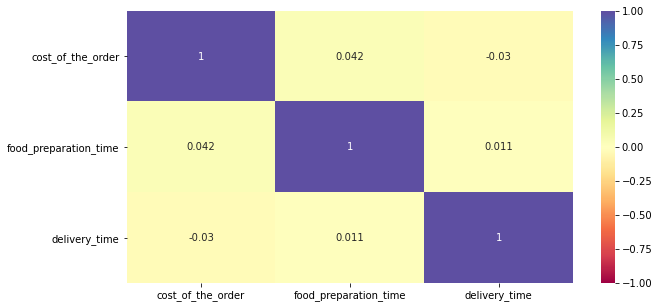

In [22]:
#defines a variable that makes a list of the 3 numerical variables within the dataset
numerical_variables = ['cost_of_the_order','food_preparation_time','delivery_time']

#calculates the correlation coefficient between every combination of numerical variables
corr=df[numerical_variables].corr()

#defining the specifics of the outputted heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)

#shows the figure
plt.show()

#### Observations:
- None of the numerical variables have a very high correlation factor. Delivery time, order cost, and food preparation time have little to no correlation in every combination. 

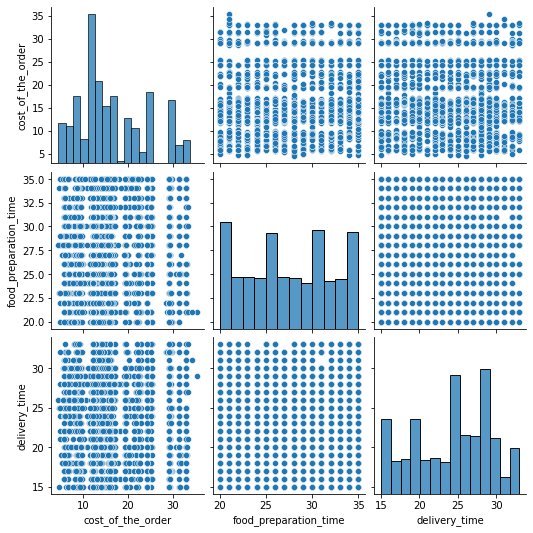

In [23]:
#produces a set of graphs (scatterplots) that visualizes the relationships between every numerical variable 
#in the dataset
sns.pairplot(df[numerical_variables])
plt.show()

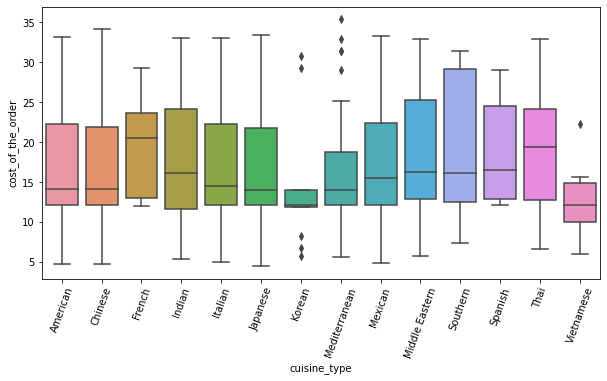

In [24]:
#comparing cuisine_type (categorical variable) vs cost (numerical variable) using a boxplot

plt.figure(figsize=(10,5))
sns.boxplot(x ='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=70)
plt.show()

<b>Observations: </b>
The different cuisine types have a variation in the average overall cost of orders. French food has the highest mean cost with a small distribution of costs (ranging from around 13 dollars up to about 30 dollars). Vietnamese food has the lowest mean cost with a small distribution (ranging from around 5 dollars to 15 dollars with an outlier instance at about 20 dollars). Mediterranean food and Korean food both have a few outlier values that lie outside of the interquartile ranges of the food types. 

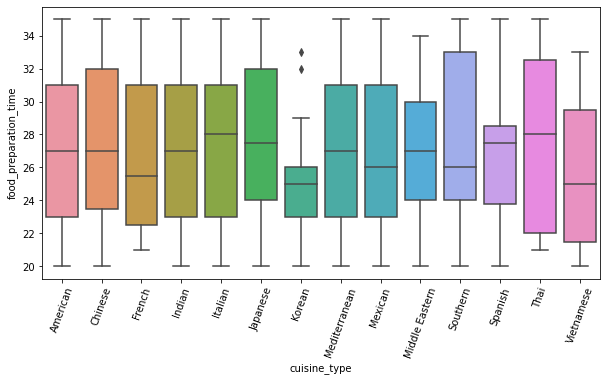

In [25]:
#comparing cuisine_type (categorical variable) vs food_preparation_time (numerical variable) using a boxplot

plt.figure(figsize=(10,5))
sns.boxplot(x ='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation=70)
plt.show()

<b>Observations: </b>
The different cuisine types all have similar distributions of average overall food prep time. Korean food takes the least amount of time to prepare with the average time being around 25 minutes per order. Thai and Italian food have some of the slowest food prep times with averages around 28 minutes. The Korean food orders in this dataset have 2 outlier values between 32 and 34 minutes that fall outside the IQR for the rest of the korean food data. 

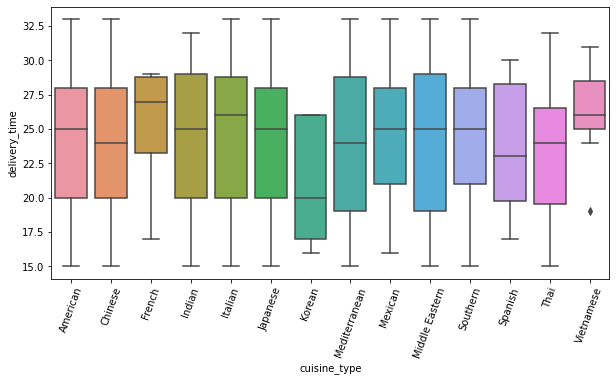

In [26]:
#comparing cuisine_type (categorical variable) vs delivery_time (numerical variable) using a boxplot

plt.figure(figsize=(10,5))
sns.boxplot(x ='cuisine_type', y='delivery_time', data=df)
plt.xticks(rotation=70)
plt.show()

<b>Observations: </b>
The distribution of delivery time varies alot between the type of food ordered compared to the prep time. Korean food has the fastest average overall delivery times compared to every other food type with an average of around 20 minutes. Vietnamese and Italian food have the slowest overall delivery times with an average of around 26 minutes. The only food type that has any ouutlier data is Vietnamese, which had one order was delivered very quickly compared to most of their other orders (in around 19 minutes). 

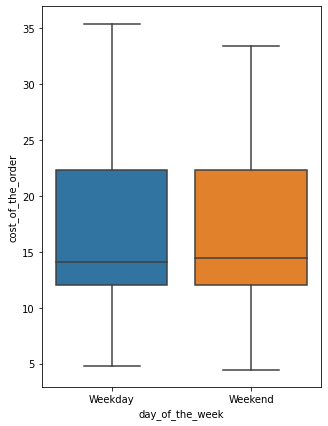

In [27]:
#comparing day_of_the_week (categorical variable) vs cost (numerical variable) using a boxplot

plt.figure(figsize=(5,7))
sns.boxplot(x ='day_of_the_week', y='cost_of_the_order', data=df)
plt.xticks(rotation=0)
plt.show()

<b>Observations: </b>
The average cost of the order is not very affected by whether the order was placed on a weekend or a week day. There is slightly more variation in the spread of the typical costs of orders placed on weekdays. The interquartile range on the weekends is a little bit larger as some of the orders are a bit more expensive compared to weekday orders. 

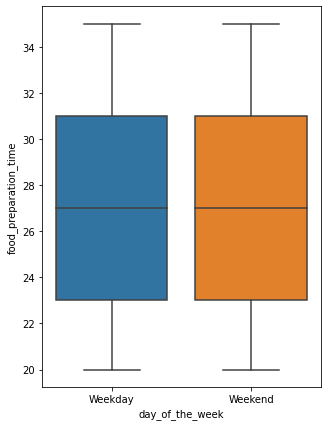

In [28]:
#comparing day_of_the_week (categorical variable) vs food_preparation_time (numerical variable) using a boxplot

plt.figure(figsize=(5,7))
sns.boxplot(x ='day_of_the_week', y='food_preparation_time', data=df)
plt.xticks(rotation=0)
plt.show()

<b>Observations: </b>
There is virtually no effect on the distribution of food preparation time on the weekend versus on the weekdays as the boxplots look practically identical. 

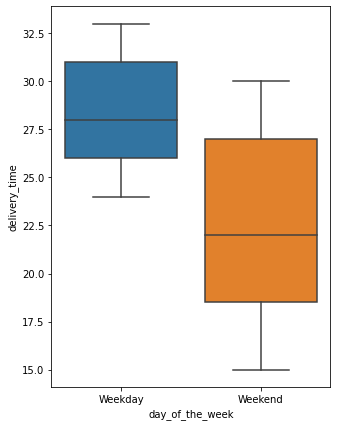

In [29]:
#comparing day_of_the_week (categorical variable) vs delivery_time (numerical variable) using a boxplot

plt.figure(figsize=(5,7))
sns.boxplot(x ='day_of_the_week', y='delivery_time', data=df)
plt.xticks(rotation=0)
plt.show()

<b>Observations: </b>
On average, orders tend to be delivered much slower overall (greater delivery times) on the weekdays compared to the weekends. There is a wider range of delivery times seen on the weekends. The average delivery time on the weekdays is about 28 minutes whereas the average delivery time on the weekends is only around 22 minutes. 

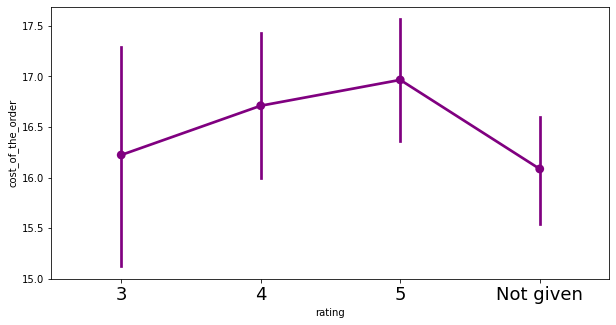

In [30]:
#comparing rating (categorical variable) vs cost (numerical variable) using a pointplot

plt.figure(figsize=(10,5))
sns.pointplot(x ='rating', y='cost_of_the_order', data=df, order=['3','4','5','Not given'], color = "purple")
plt.xticks(size=18, rotation=0)
plt.show()

<b>Observations: </b>
Orders with higher ratings tend to be more expensive on average. Orders that are on the less expensive side of the range are less likely to be given a rating at all. 

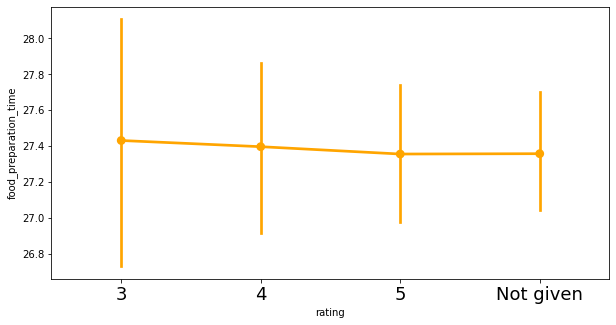

In [31]:
#comparing rating (categorical variable) vs food_preparation_time (numerical variable) using a pointplot

plt.figure(figsize=(10,5))
sns.pointplot(x ='rating', y='food_preparation_time', data=df, order=['3','4','5','Not given'], color = "orange")
plt.xticks(size=18, rotation=0)
plt.show()

<b>Observations: </b>
Orders with different ratings have approximately the same average rating. The average food preparation time is around 27.5 for every rating and is the same for orders that are not rated at all. 

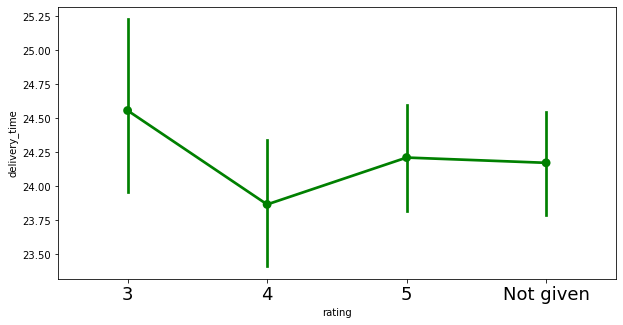

In [32]:
#comparing rating (categorical variable) vs delivery_time (numerical variable) using a pointplot

plt.figure(figsize=(10,5))
sns.pointplot(x ='rating', y='delivery_time', data=df, order=['3','4','5','Not given'], color = "green")
plt.xticks(size=18, rotation=0)
plt.show()

<b>Observations: </b>
Orders that are rated a 3 have a higher average delivery time compared to order that are rated higher. The higher 2 ratings (4 and 5) have lower average delivery times (orders are delivered faster). Orders that are not given a rating have an average delivery time of about 24.2 minutes. 

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [33]:
#create a new dataframe (called ratedplaces) that contains only the restaurants that have received a rating
ratedplaces = df[df['rating'] != 'Not given'].copy()

#grouping restaurant names and their rating counts
#groupby, restaurant_name, rating, .count(), .sort_values
#using reset_index to add column names
number_of_ratings = ratedplaces.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()

#find mean of rating (>4):
#find restaurants from number_of_ratings that has count over 50 and create a new df with it
morethan50 = number_of_ratings[number_of_ratings['rating'] >= 50]['restaurant_name'].reset_index()

#find the average rating for each of the 4 restaurants that have ratings > 50
top4 = ratedplaces[ratedplaces['restaurant_name'].isin(morethan50['restaurant_name'])].copy()
#this produces a dataframe with all of the data from only the 4 restaurants that have been rated over 50 times

#groupby function to find average rating for each restaurant
top4['rating'] = top4['rating'].astype('int')
top4means = top4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()
top4means

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi are the restaurants that fulfill the criteria for the promotional offer. 

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [34]:
#revenue = 0.25 * cost if cost>20
#else: 0.15 * cost if cost>5 

#creating a new column called "company_charge" to store the charge by foodhub 
df['company_charge'] = [order * 0.25 if order >20 
                        else order * 0.15 if order >5 
                        else 0 
                        for order in df['cost_of_the_order']]

#total revenue = sum of 'company_charge' column
revenue = df['company_charge'].sum()
print(revenue)

6166.303


#### Observations:
The total revenue by foodhub would be 6166 dollars and 30 cents for all of the orders within the dataset. 

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [35]:
#create a new column within the df dataframe that calculates the total time of each order (prep time+delivery time):
df['total_del_time'] = df['food_preparation_time'] + df['delivery_time']

slow_orders = df[df['total_del_time']>60].shape[0]
print("total number of slow orders (above 60 minutes):", slow_orders)
# .shape[0] gives the number of rows which would equal the number of unique orders (rows) 
# that are valued greater than 20

#"total" variable defined previously in Q9 (total number of orders)
print("overall total number of orders:",total)

#calculating the percentage
percentage_slow = (slow_orders/total) * 100
print("Percentage of slow orders:", percentage_slow,"%")

total number of slow orders (above 60 minutes): 200
overall total number of orders: 1898
Percentage of slow orders: 10.537407797681771 %


#### Observations:
10.54% of total orders took longer than 60 minutes in total delivery time (food prep time + delivery time). 

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [36]:
#finding the mean of the delivery_time column by day of the week using the groupby function

day_dev_time = df.groupby(['day_of_the_week'])['delivery_time'].mean().reset_index()
print(day_dev_time)

  day_of_the_week  delivery_time
0         Weekday      28.340037
1         Weekend      22.470022


#### Observations:
The mean delivery time on the weekdays is 28.34 minutes while the mean delivery time on the weekends is only 22.47 minutes. Weekend orders are delivered quicker on average than weekday orders. 

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

#### Key Insights:

##### Making delivery times quicker (how and why): 
- How: Foodhub may be able to decrease overall delivery times on the weekdays by incentivizing drivers to run orders. Weekdays have a slower delivery time compared to weekends (we found this in Q12). So, getting more delivery drivers out on the road on the weekdays would be beneficial to getting orders to customer quicker. 
- Why: As we found in Q12, orders that are rated lower (rated a 3) have a higher average delivery time (are delivered slower) compared to orders that are rated a 4 or a 5. Therefore, orders that are delivered faster, are rated higher on average. Therefore, orders may start receiving higher ratings if they are delivered faster. This would also bring down the total overall delivery time. 

##### Many orders are not rated at all. How to fix this: 
- As we found in Q5, 736 of the 1898 orders within the dataset did not receive a rating at all. This is almost 40% (37.8%) of all orders that were completed within this dataset. Orders that are not rating result in the restaurant potentially not being eligible for promotional offers that are based on number of overall rating and overall average rating. 
- Providing a rating with feedback could help provide valuable insights on how to improve the customer experience whether that be on the restaruant side or the delivery side. 
- Potential fix: Foodhub could benefit from implementing a system that will email a customer shortly after an order is completed to remind them to rate their order if they havent done so yet. This could be further pushed to the customer in a similar style employed by Uber, by requiring a rating on a previous order before a new order can be placed within the app. 

##### Promoting restaurants with low order numbers: 
- Using this dataset, Foodhub could target the restaurants or cuisine types with the lowest overall number of orders placed. For example, based on the output of Q7, Foodhub could advertise promotional offers for discounted delivery for orders placed from Klong, Kambi Ramen House, Il Bambino, Hunan Manor, and Lamarca Pasta in order to incentivize more customers ordering food from the less popular restaurants. Ideally, a customer is more likely to order from these places again in the future if they have already had a pleasant experience with that restaurant. Their next order would yeild more profit as well as it would likely not have a discount on it. 